In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps


# Task 4 
## Определить, являются ли зависимыми выборки на уровне значимости $\alpha = 0.05$

In [19]:
data4 = pd.read_csv('./hw5_t4_v0.txt', header=None, sep=' ')
data4.head()

,0,1
0,-0.9763,0.0083
1,-0.8274,-1.2777
2,0.5196,-0.0080
3,0.2147,-0.3537
4,-0.9417,1.3699


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

Взглянем на наши данные

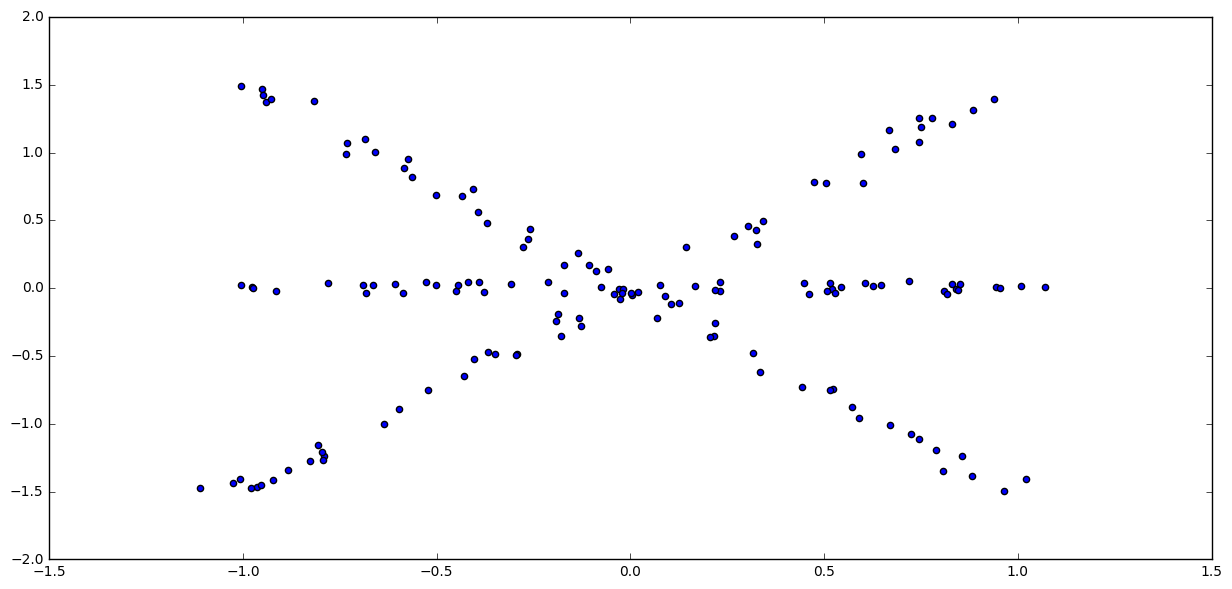

In [18]:
plt.figure(figsize=(15,7))
plt.scatter(data4[0], data4[1])
plt.show()

Взглянем на гистограммы выборок

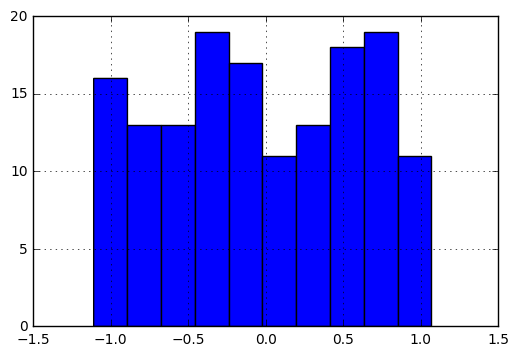

In [20]:
data4[0].hist()

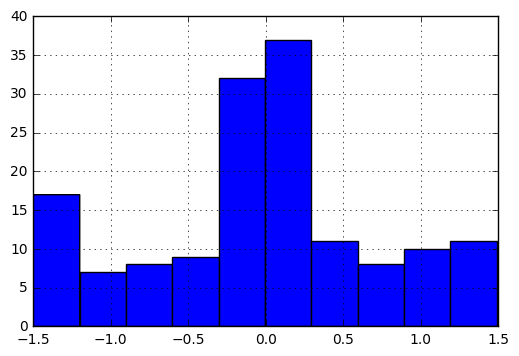

In [21]:
data4[1].hist()

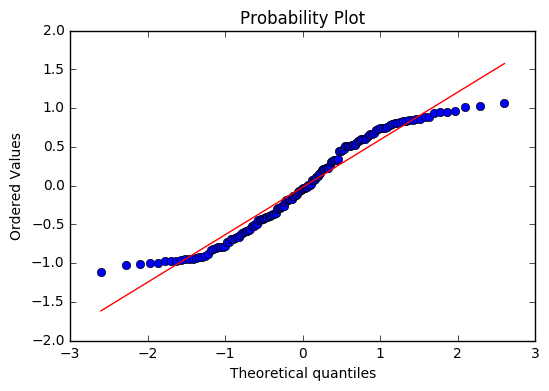

In [24]:
sps.probplot(data4[0], plot=plt)
plt.show()

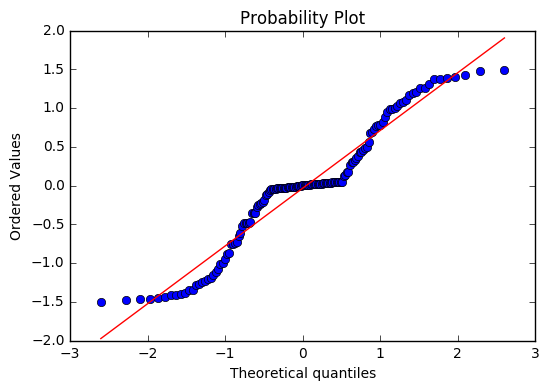

In [25]:
sps.probplot(data4[1], plot=plt)
plt.show()

In [26]:
sps.shapiro(data4[0]), sps.shapiro(data4[1])

((0.9483122825622559, 2.37746298807906e-05),
 (0.9426835179328918, 8.474721653328743e-06))

Обе отвергаются (не будем делать поправку на множественную проверку гипотез, она все равно не поможет, слишком уж маленький p_values)

Так как выборки не являются нормальными, делать какой-то анализ на основе коэффициента корреляции Пирсона не стоит

In [27]:
sps.pearsonr(data4[0],data4[1]), sps.spearmanr(data4[0],data4[1])

((0.051862707660944009, 0.52850053950791043),
 SpearmanrResult(correlation=0.041041897047685766, pvalue=0.61801628366075401))

Гипотезу о некоррелируемости нельзя отвергнуть, хотя это странно, на взгляд выборки зависимы

Попробуем применить критерий хи-квадрат на основе таблицы сопряженности

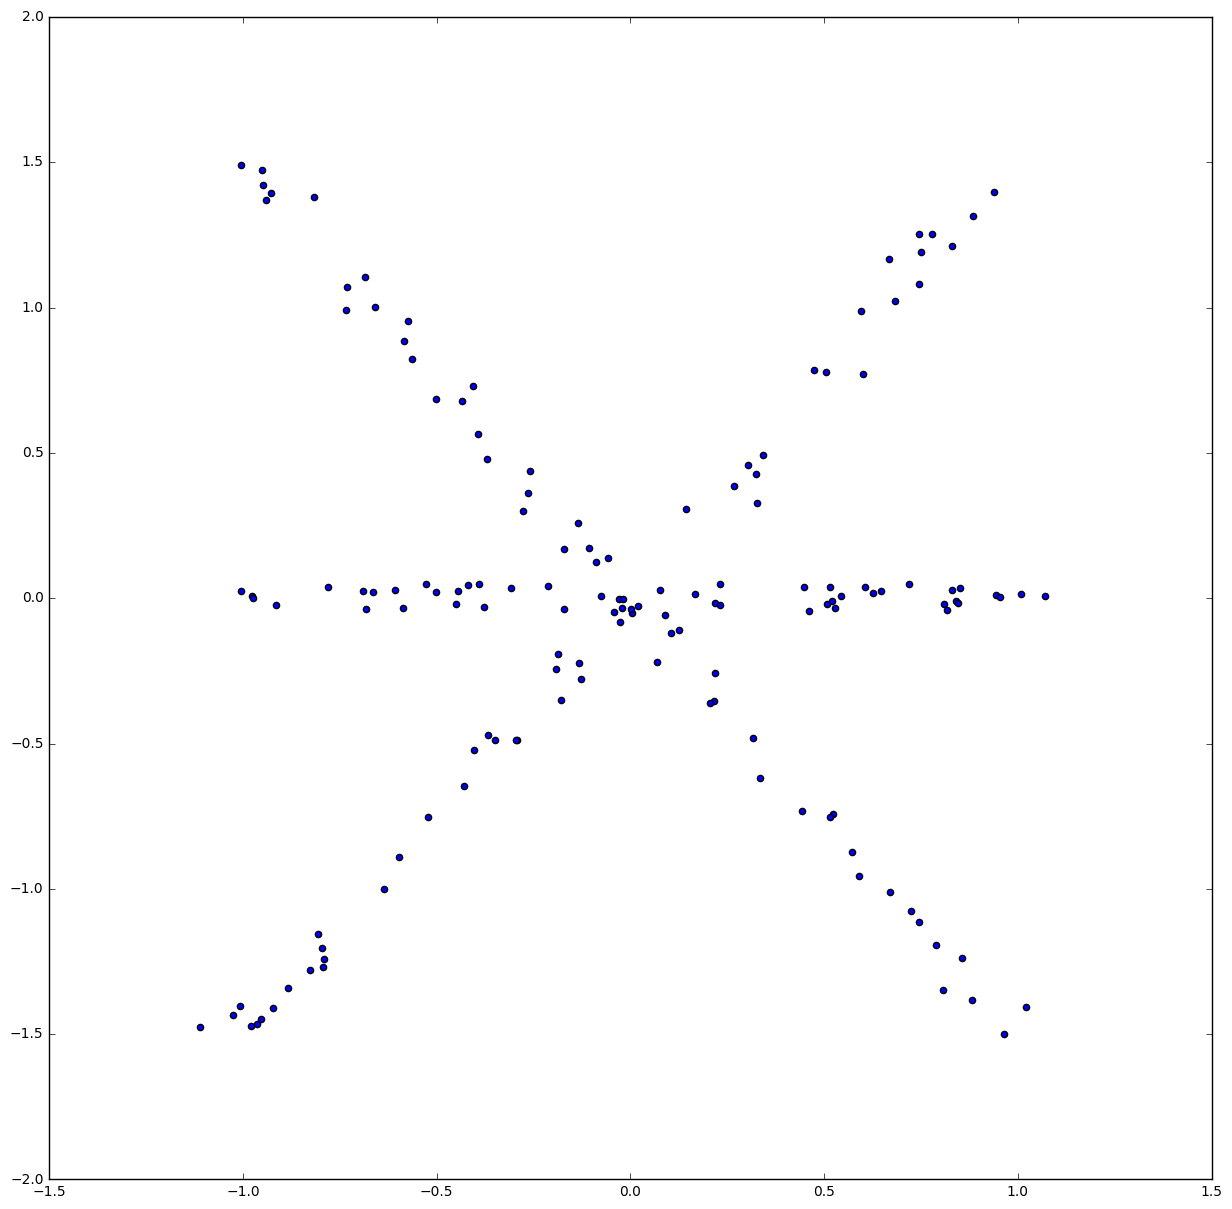

In [44]:
plt.figure(figsize=(15,15))
plt.scatter(data4[0], data4[1])
plt.show()

In [41]:
bounds = [[-1.25, 1.25],[-1.5, 1.5]]

In [47]:
observed = np.histogram2d(data4[0], data4[1], bins=[20,10])[0]
observed

array([[ 3.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 4.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  0.,  4.],
       [ 5.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  1.,  2.,  0.,  0.,  3.,  0.],
       [ 0.,  1.,  1.,  0.,  1.,  2.,  0.,  1.,  2.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  2.,  0.,  2.,  0.,  0.],
       [ 0.,  0.,  1.,  3.,  2.,  3.,  2.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  0.,  1.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  4.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  5.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  3.,  1.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  2.,  3.,  1.,  2.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  1.,  0.,  0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  3.,  0.,  3.,  2.,  0.,  2.,  0.,  0.],
       [ 0.,  1.,  1.,  0.,  1.,  3.,  0.,  1.,  1.,  0.],
       [ 0.,  2.,  0.,  0.,  0.,  2.,  0.,  0.,  2.,  0.

In [49]:
sps.chi2_contingency(observed)[:2]

(311.31482457849796, 3.0612028094965011e-10)

На уровне значимости $\alpha = 0.05$ мы можем отвернуть гипотезу некоррелируемости!

# Task 5
## Проверить на независимость методами корреляционного анализа выборки , и проверить независимость в совокупности, еслм какие-то будут зависимы, то указать эти пары

In [56]:
data5 = pd.read_csv('./flare.data1.csv', sep=' ', header=None)
data5 = data5[data5.columns[:10]]
data5.head()

,0,1,2,3,4,5,6,7,8,9
0,C,S,O,1,2,1,1,2,1,2
1,D,S,O,1,3,1,1,2,1,2
2,C,S,O,1,3,1,1,2,1,1
3,D,S,O,1,3,1,1,2,1,2
4,D,A,O,1,3,1,1,2,1,2


In [62]:
set(data5[1])

{'A', 'H', 'K', 'R', 'S', 'X'}

In [58]:
set(data5[0])

{'B', 'C', 'D', 'E', 'F', 'H'}

In [60]:
set(data5[2])

{'C', 'I', 'O', 'X'}

попарно первые три столбца пересекаются по 1 букве

In [63]:
data5.corr(method='pearson')

,3,4,5,6,7,8,9
3,1.000000,-0.072487,0.536675,0.230220,0.094830,0.312150,0.083329
4,-0.072487,1.000000,-0.141088,-0.126453,0.006070,0.019573,-0.031164
5,0.536675,-0.141088,1.000000,0.230507,0.076799,0.264148,0.112042
6,0.230220,-0.126453,0.230507,1.000000,0.180021,0.182669,0.300203
7,0.094830,0.006070,0.076799,0.180021,1.000000,0.039904,-0.101861
8,0.312150,0.019573,0.264148,0.182669,0.039904,1.000000,0.096333
9,0.083329,-0.031164,0.112042,0.300203,-0.101861,0.096333,1.000000


In [64]:
data5.corr(method='spearman')

,3,4,5,6,7,8,9
3,1.000000,-0.085252,0.536675,0.230220,0.094830,0.312150,0.083329
4,-0.085252,1.000000,-0.154748,-0.126619,0.019333,0.012828,-0.032015
5,0.536675,-0.154748,1.000000,0.230507,0.076799,0.264148,0.112042
6,0.230220,-0.126619,0.230507,1.000000,0.180021,0.182669,0.300203
7,0.094830,0.019333,0.076799,0.180021,1.000000,0.039904,-0.101861
8,0.312150,0.012828,0.264148,0.182669,0.039904,1.000000,0.096333
9,0.083329,-0.032015,0.112042,0.300203,-0.101861,0.096333,1.000000


In [66]:
data5.corr(method='kendall')

,3,4,5,6,7,8,9
3,1.000000,-0.083316,0.536675,0.230220,0.094830,0.312150,0.083329
4,-0.083316,1.000000,-0.151235,-0.123744,0.018894,0.012537,-0.031288
5,0.536675,-0.151235,1.000000,0.230507,0.076799,0.264148,0.112042
6,0.230220,-0.123744,0.230507,1.000000,0.180021,0.182669,0.300203
7,0.094830,0.018894,0.076799,0.180021,1.000000,0.039904,-0.101861
8,0.312150,0.012537,0.264148,0.182669,0.039904,1.000000,0.096333
9,0.083329,-0.031288,0.112042,0.300203,-0.101861,0.096333,1.000000


In [67]:
data5[[0,1,2]]

,0,1,2
0,C,S,O
1,D,S,O
2,C,S,O
3,D,S,O
4,D,A,O
5,D,A,O
6,D,A,O
7,D,A,O
8,D,K,O
9,C,R,O


In [82]:
sps.spearmanr(data5[0], data5[2])

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:249: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


SpearmanrResult(correlation=0.33167714228225231, pvalue=9.8558922663577165e-10)

In [83]:
import seaborn as sns

In [85]:
data5.describe()

,3,4,5,6,7,8,9
count,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000,323.000000
mean,1.139319,2.486068,1.191950,1.368421,1.947368,1.027864,1.755418
std,0.346816,0.601983,0.590029,0.483125,0.223643,0.164838,0.430506
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000
50%,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,2.000000
75%,1.000000,3.000000,1.000000,2.000000,2.000000,1.000000,2.000000
max,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000


In [105]:
sps.kendalltau(data5[[0,1]])

TypeError: kendalltau() missing 1 required positional argument: 'y'

In [104]:
from itertools import combinations
from tqdm import tqdm

In [148]:
correlations = [sps.spearmanr, sps.kendalltau]
p_vals = []
for comb in tqdm(combinations(data5, 2)):
    to_push = []
    x = data5[comb[0]]
    y = data5[comb[1]]
    for corr in correlations:
        to_push.append(corr(x, y)[1])
    p_vals.append(to_push)

p_vals = np.array(p_vals)

0it [00:00, ?it/s]/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:249: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)
45it [00:00, 448.55it/s]


In [149]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [193]:
results = multipletests(p_vals.ravel(), method='holm')


Посмотрим на результаты, если в строке есть хотя бы один True, то гипотезу отвергаем. Выведем те пары, для которых мы отвергаем некоррелируемость

In [187]:
results[0].reshape(len(results[0]) / 2, 2)

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([[ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [ True,  True],
       [False, False],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [False, False],
       [False, False],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [False, False],
       [ True,  True],
       [ True,  True],
       [False, False],
       [ True,  True],
       [False, False],
       [False,  True],
       [False,  True],
       [False, False],
       [False, False],
       [False, False],
       [ True,  True],
       [False, False],
       [ True,  True],
       [False, False],
       [False,  True],
       [ True,  True],
       [ True,  True],
       [False, False],
       [Fal

In [189]:
rejected_indices = np.where(np.any(results[0].reshape(len(results[0]) / 2, 2),axis=1))
rejected_indices = rejected_indices[0]
rejected_indices

/usr/local/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


array([ 0,  1,  5,  6,  8,  9, 13, 16, 17, 18, 19, 20, 21, 22, 25, 26, 28,
       30, 31, 35, 37, 39, 40, 41])

Выведем пары столбцов, которые мы считаем зависимыми

In [191]:
len(np.array(list(combinations(data5, 2)))[rejected_indices])

24

In [192]:
np.array(list(combinations(data5, 2)))[rejected_indices]

array([[0, 1],
       [0, 2],
       [0, 6],
       [0, 7],
       [0, 9],
       [1, 2],
       [1, 6],
       [1, 9],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [2, 7],
       [2, 8],
       [3, 5],
       [3, 6],
       [3, 8],
       [4, 5],
       [4, 6],
       [5, 6],
       [5, 8],
       [6, 7],
       [6, 8],
       [6, 9]])

Наши выборки не являются независимыми в совокупности

# Task 6

## проверить с помощью корреляционного анализа, является ли выборка из многмоерного нормального

In [303]:
column_names = ['Water', 'SP', 'Fine Aggr.', 'SLUMP(cm)', 'FLOW(cm)', 'Compressive Strength (28-day)(Mpa)']

In [304]:
data6 = pd.read_csv('./slump_test.data.csv')

In [305]:
data6 = data6[column_names]
data6.head()

,Water,SP,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,210.0,9.0,680.0,23.0,62.0,34.99
1,180.0,12.0,746.0,0.0,20.0,41.14
2,179.0,16.0,743.0,1.0,20.0,41.81
3,179.0,19.0,741.0,3.0,21.5,42.08
4,220.0,10.0,658.0,20.0,64.0,26.82


In [306]:
from sklearn.cross_validation import train_test_split

In [319]:
X_train, X_test = train_test_split(data6)

Найдем коэффициенты корреляции(Пирсона) на тренировочной выборке

In [320]:
corr_table = X_train.corr()
corr_table

,Water,SP,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Water,1.000000,-0.068059,0.202383,0.436486,0.583513,-0.360782
SP,-0.068059,1.000000,0.004456,-0.174267,-0.102376,-0.064969
Fine Aggr.,0.202383,0.004456,1.000000,0.256759,0.281061,-0.221715
SLUMP(cm),0.436486,-0.174267,0.256759,1.000000,0.917538,-0.263382
FLOW(cm),0.583513,-0.102376,0.281061,0.917538,1.000000,-0.211296
Compressive Strength (28-day)(Mpa),-0.360782,-0.064969,-0.221715,-0.263382,-0.211296,1.000000


In [321]:
means_vector = X_train.mean(axis=0)
means_vector

Water                                 196.172727
SP                                      8.500000
Fine Aggr.                            745.984416
SLUMP(cm)                              17.448052
FLOW(cm)                               48.349351
Compressive Strength (28-day)(Mpa)     36.717273
dtype: float64

In [322]:
X_train.describe()

,Water,SP,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,196.172727,8.500000,745.984416,17.448052,48.349351,36.717273
std,20.036799,2.843876,65.883917,9.181587,17.666215,7.982459
min,160.000000,4.400000,640.600000,0.000000,20.000000,18.520000
25%,180.000000,6.000000,691.000000,14.500000,31.000000,30.970000
50%,196.000000,8.000000,747.000000,21.500000,53.000000,36.190000
75%,209.000000,10.000000,790.000000,24.000000,62.000000,41.540000
max,240.000000,19.000000,902.000000,29.000000,78.000000,58.530000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111077f28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1112b29e8>]], dtype=object)

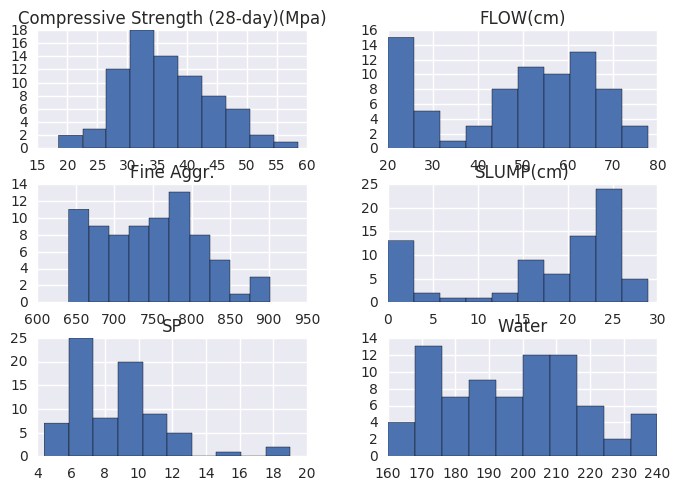

In [323]:
X_train.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1112d80b8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x112e26cf8>]], dtype=object)

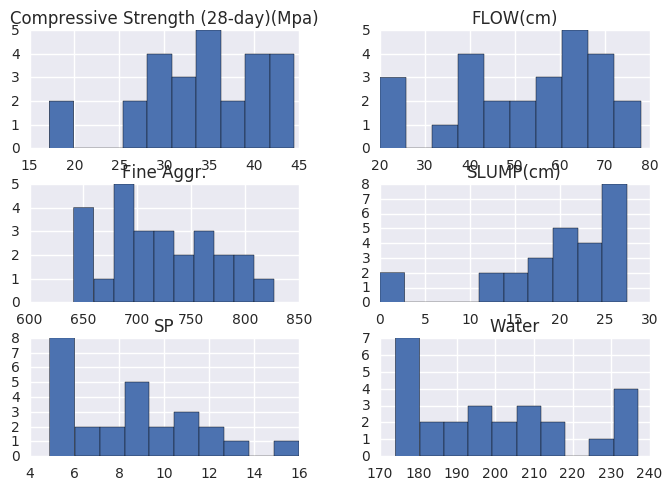

In [324]:
X_test.hist()

In [377]:
stds = X_train.std().values
stds

array([ 20.03679928,   2.84387615,  65.88391718,   9.18158713,
        17.66621533,   7.9824585 ])

In [378]:
corr_table

,Water,SP,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
Water,1.000000,-0.068059,0.202383,0.436486,0.583513,-0.360782
SP,-0.068059,1.000000,0.004456,-0.174267,-0.102376,-0.064969
Fine Aggr.,0.202383,0.004456,1.000000,0.256759,0.281061,-0.221715
SLUMP(cm),0.436486,-0.174267,0.256759,1.000000,0.917538,-0.263382
FLOW(cm),0.583513,-0.102376,0.281061,0.917538,1.000000,-0.211296
Compressive Strength (28-day)(Mpa),-0.360782,-0.064969,-0.221715,-0.263382,-0.211296,1.000000


In [379]:
from copy import deepcopy

In [380]:
covariation_matrix = deepcopy(corr_table.values)

In [381]:
for i in range(len(covariation_matrix)):
    for j in range(len(covariation_matrix[i])):
        covariation_matrix[i][j] *= stds[i] * stds[j]

In [382]:
covariation_matrix.shape

(6, 6)

In [383]:
pd.DataFrame(covariation_matrix)

,0,1,2,3,4,5
0,401.473325,-3.878158,267.166148,80.300209,206.548732,-57.704536
1,-3.878158,8.087632,0.834868,-4.550329,-5.143421,-1.474868
2,267.166148,0.834868,4340.690543,155.318259,327.132490,-116.603293
3,80.300209,-4.550329,155.318259,84.301542,148.828255,-19.303729
4,206.548732,-5.143421,327.132490,148.828255,312.095164,-29.796903
5,-57.704536,-1.474868,-116.603293,-19.303729,-29.796903,63.719644


In [384]:
X_test.shape

(26, 6)

In [388]:
number_of_samples = int(1e5)

In [389]:
random_multipliers = sps.cauchy.rvs(size=(number_of_samples, 6))

In [390]:
new_samples = X_test.values.dot(random_multipliers.T).T



In [ ]:
sps.wilcoxon()
sps.mannwhitneyu()

Избавимся от константных выборок, если есть, ведь на них тест на нормальность проводивть смысла вооще нет

In [413]:
new_samples = new_samples[new_samples.std(axis=1) != 0]

Теперь мы получили 10000 выборки по 26 элементов, каждая из которых должна быть из нормального распределения, при справедливости нулевой гипотезы(то что наша исходная выборка из многомерного нормального распределения)

((array([-1.93807102, -1.52350933, -1.27167259, -1.08178602, -0.92453898,
         -0.78737238, -0.66363796, -0.54932825, -0.44179391, -0.33915032,
         -0.23996855, -0.143098  , -0.04755496,  0.04755496,  0.143098  ,
          0.23996855,  0.33915032,  0.44179391,  0.54932825,  0.66363796,
          0.78737238,  0.92453898,  1.08178602,  1.27167259,  1.52350933,
          1.93807102]),
  array([ 4069.72848272,  4086.98446012,  4111.46440722,  4113.0089597 ,
          4194.85812742,  4261.19450195,  4271.82513478,  4273.93103601,
          4296.74518297,  4311.61875538,  4360.08804481,  4439.15382796,
          4504.15084129,  4524.4625237 ,  4528.43905758,  4550.64979899,
          4635.1982552 ,  4668.45093399,  4745.58135896,  4766.88567659,
          4785.90250441,  4873.4199812 ,  4931.37323025,  4960.9994413 ,
          5000.24900725,  5172.03195659])),
 (324.9156998222258, 4516.8613649359822, 0.98308595009629596))

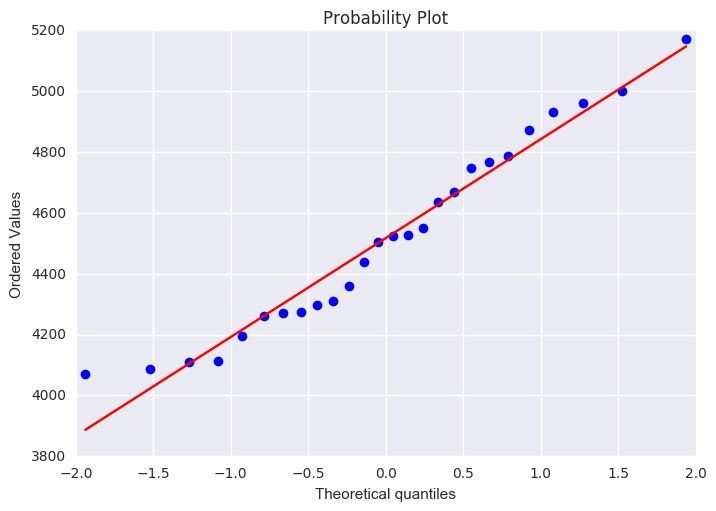

In [391]:
sps.probplot(new_samples[18], plot=plt)

In [392]:
sps.shapiro(new_samples[18])

(0.9531509876251221, 0.27451419830322266)

Так как мы всегда домножали на известный нам вектор v, то получив новые случайные величины, мы знаем их распределение: $\mathcal{N}(<v, \hat{\mu}>, v\hat{\Sigma}v^T)$

Запишем в массив параметры нормальных распределений для каждой из 1234 выборок

In [393]:
random_multipliers.shape

(100000, 6)

In [394]:
new_means = random_multipliers.dot(means_vector)

In [395]:
covariation_matrix

array([[  4.01473325e+02,  -3.87815789e+00,   2.67166148e+02,
          8.03002093e+01,   2.06548732e+02,  -5.77045359e+01],
       [ -3.87815789e+00,   8.08763158e+00,   8.34868421e-01,
         -4.55032895e+00,  -5.14342105e+00,  -1.47486842e+00],
       [  2.67166148e+02,   8.34868421e-01,   4.34069054e+03,
          1.55318259e+02,   3.27132490e+02,  -1.16603293e+02],
       [  8.03002093e+01,  -4.55032895e+00,   1.55318259e+02,
          8.43015422e+01,   1.48828255e+02,  -1.93037291e+01],
       [  2.06548732e+02,  -5.14342105e+00,   3.27132490e+02,
          1.48828255e+02,   3.12095164e+02,  -2.97969031e+01],
       [ -5.77045359e+01,  -1.47486842e+00,  -1.16603293e+02,
         -1.93037291e+01,  -2.97969031e+01,   6.37196438e+01]])

Чекнем, что матрица ковариация неотрицательно определенная квадратичная форма, если следующая ячейка не падает с ошибкой, то все ок)


In [400]:
sps.multivariate_normal(means_vector, covariation_matrix).rvs(1)

array([ 145.05945035,   12.65255719,  630.01860988,    0.9370633 ,
          6.69873838,   53.82408847])

In [396]:
new_covar = []
for vec in tqdm(random_multipliers):
    new_covar.append(vec.dot(covariation_matrix).dot(vec))

100%|██████████| 100000/100000 [00:00<00:00, 341429.75it/s]


А теперь возбмем и сделаем множественную проверку гипотез (для всех выборок проверим равенство нормальному распределению с новыми параметрами) выберем процедуру, контролирующую FWER на уровне 0.05, причем, так как мы домножали всегда на рандомный вектор, то все получившиеся выборки независимы, а значит и статистики от них юудут независимыми и мы можем применить метод Холма-Шидака, он будет самым мощным среди остальных вариантов

In [397]:
p_values = []
for i in tqdm(range(len(new_samples))):
    results = sps.kstest(new_samples[i], sps.norm(new_means[i], np.sqrt(new_covar[i])).cdf)
    p_values.append(results[1])

100%|██████████| 100000/100000 [02:18<00:00, 722.75it/s]


In [401]:
p_values[:10]

[0.24631219044435415,
 0.11600597204336682,
 0.020087252954848145,
 0.14387055863114284,
 0.04172733391086525,
 0.23230881016193194,
 0.019360178258300165,
 0.12887145776416564,
 0.42836584922341658,
 0.143577487787522]

In [402]:
results = multipletests(p_values)[0]

In [403]:
np.any(results)

False

Получается, что ни одна из гипотез о нормальности не отвергается и контролируя FWER на уровне 0.05 мы не можем отвергнуть гипотезу о том, что наша выборка из многомерного нормального распределения. Так как мы проверили одно из эквивалентных определений многомерного нормального распределения:(что произвольная лин комбинация компонент вектора - норм. с.в. или константа)

In [417]:
sps.t(118).ppf(0.995)

2.6181369135911869

In [418]:
2.49271

2.49271

In [419]:
ddof = 51


In [420]:
sps.t(51).ppf(0.995)

2.6757222341106464

In [450]:
marks = np.array(
[ [172, 36, 15],
  [120,49,36]])

In [447]:
np.sqrt((223 * 205) / (223 + 205)) * new_marks[1][0]

1.6684189550731978

In [427]:
np.sum(marks, axis = 1)

array([223, 205])

In [425]:
new_marks = marks.T / np.sum(marks, axis = 1)
new_marks

array([[ 0.77130045,  0.58536585],
       [ 0.16143498,  0.23902439],
       [ 0.06726457,  0.17560976]])

In [451]:
sps.ks_2samp([0] * marks[0][0] + [1] * marks[0][1] + [2] * marks[0][2],
            [0] * marks[1][0] + [1] * marks[1][1] + [2] * marks[1][2])

Ks_2sampResult(statistic=0.1859345947719568, pvalue=0.0010281450281554784)

In [435]:
np.cumsum(sorted(new_marks[:,0])), np.cumsum(sorted(new_marks[:,1])) 

(array([ 0.06726457,  0.22869955,  1.        ]),
 array([ 0.17560976,  0.41463415,  1.        ]))

In [437]:
np.cumsum(sorted(new_marks[:,0])) - np.cumsum(sorted(new_marks[:,1])) 

array([-0.10834518, -0.18593459,  0.        ])

на втором

In [443]:
aa = sorted(np.concatenate((np.cumsum(sorted(new_marks[:,0])), np.cumsum(sorted(new_marks[:,1]))) ))
aa

[0.06726457399103139,
 0.17560975609756097,
 0.22869955156950672,
 0.41463414634146339,
 1.0,
 1.0]

In [444]:
for i in range(1, len(aa)):
    print (abs(aa[i] - aa[i  - 1]))

0.108345182107
0.0530897954719
0.185934594772
0.585365853659
0.0


In [432]:
1.36

1.36